In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import os

# Regression

## Linear Regression

* Each data point $x \in \mathbb{R}^m$
* Each data point $x$ has a corresponding $y$ value
* Goal: Predict $y$ for an arbitrary value of $x$ based on our data

<IPython.core.display.Javascript object>


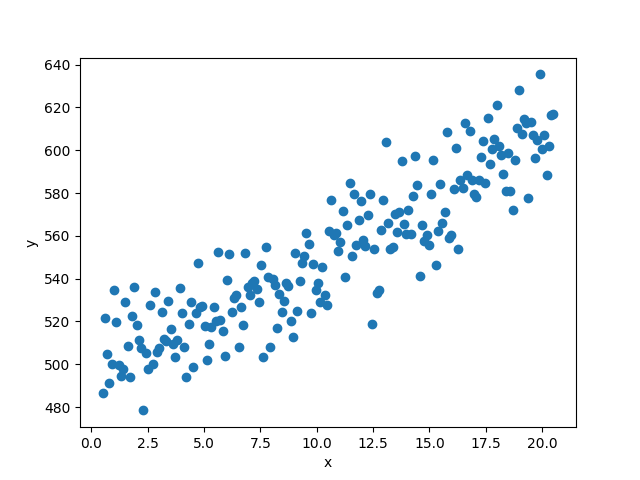

In [90]:
xs = np.linspace(0.5, 20.5, 200)
ys = 5*(xs+3*np.random.randn(xs.shape[0])) + 500

fig, ax = plt.subplots()
ax.scatter(xs, ys)
ax.set_xlabel("x")
ax.set_ylabel("y")

We will do our prediction by finding the line that minimizes the Euclidean (straight line) distance between each point and the line.

For each $i \in N$
\begin{align*}
    y_i &= mx_i + b \\
    \min_{m, b} & \sum_i \left( mx_i + b - y_i \right)
\end{align*}

However, we can re-write this as a matrix operation
\begin{align*}
    y_i &= mx_i + b \\
    y_i &=
        \begin{bmatrix}
            x_i & 1
        \end{bmatrix}
        \begin{bmatrix}
            m \\
            b
        \end{bmatrix} \\
\end{align*}

Therefore

\begin{align*}
    X &= \begin{bmatrix}
        x_0 & 1 \\
        x_1 & 1 \\
        \vdots & \vdots \\
        x_{N-2} & 1 \\
        x_{N-1} & 1
        \end{bmatrix} \\
    \theta &= \begin{bmatrix}
        m \\
        b
        \end{bmatrix} \\
    Y &= \begin{bmatrix}
        y_0 \\
        y_1 \\
        \vdots \\
        y_{N-2} \\
        y_{N-1}
        \end{bmatrix} \\
    \min_{\theta} & \left( \frac{1}{2} \left|\left| X \theta - Y \right|\right|^2 = \frac{1}{2} \sum_i \left( \begin{bmatrix} x & 1 \end{bmatrix} \theta - y_i \right)^2 \right)
\end{align*}

By now, you might be able to see that, while this is a two dimensional example, this is easily generalizable to $m$ dimensions, since this would just make $X$ an $n \times m$ matrix and $\theta$ a $m$-length vector.

To solve, we would take a derivative with respect to $\theta$ and set it to 0, but we can just use one of the many solvers available through python

In [160]:
def linear_regression(xs, ys, fractest=0.2, plot=False, sk_intercept=True, man_intercept=False,
                      ret_test=True, ret_pred=True):
    xs = xs.reshape(xs.shape[0], -1)
    ys = ys.reshape(ys.shape[0], -1)
    if man_intercept and not sk_intercept:
        print("Changing the data by adding a row of 1s for all data points.")
        print("The function will fit the slope of the line and the intercept.")
        xs = np.hstack((xs, np.ones_like(xs)))
    elif man_intercept and sk_intercept:
        print("Using sklearn's intercept finding ability instead of changing the data to allow for intercepts.")
    # Split data into train and test data
    print("X shape:", xs.shape)
    print("Y shape:", ys.shape)
    choices = np.random.randint(xs.shape[0], size=round(xs.shape[0]*(1-fractest)))
    null_choices = np.array([i for i in np.arange(xs.shape[0]) if i not in choices])

    xtrain = xs[choices,:]#.reshape(-1,1)
    ytrain = ys[choices,:]#.reshape(-1,1)
    xtest = xs[null_choices,:]#.reshape(-1,1)
    ytest = ys[null_choices,:]#.reshape(-1,1)

    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=sk_intercept)

    # Train the model using the training sets
    regr.fit(xtrain, ytrain)

    # Make predictions using the testing set
    ypred = regr.predict(xtest)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(ytest, ypred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(ytest, ypred))

    if plot:
        # Plot outputs
        plt.figure()
        print(xtest.shape, ytest.shape)
        plt.scatter(xtest[:,0], ytest,  color='red', label="Testing Data")
        plt.scatter(xtrain[:,0], ytrain, facecolors="none", edgecolors="black", label="Training Data")
        plt.plot(xtest[:,0], ypred, color='blue', linewidth=3, label="Prediction")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')

        # plt.xticks(())
        # plt.yticks(())

        plt.show()
    
    if ret_test and ret_pred:
        return xtest, ytest, ypred
    elif ret_test:
        return xtest, ytest
    elif ret_pred:
        return ypred

X shape: (200, 1)
Y shape: (200, 1)
Coefficients: 
 [[ 5.72150642]]
Mean squared error: 262.95
Variance score: 0.78


<IPython.core.display.Javascript object>


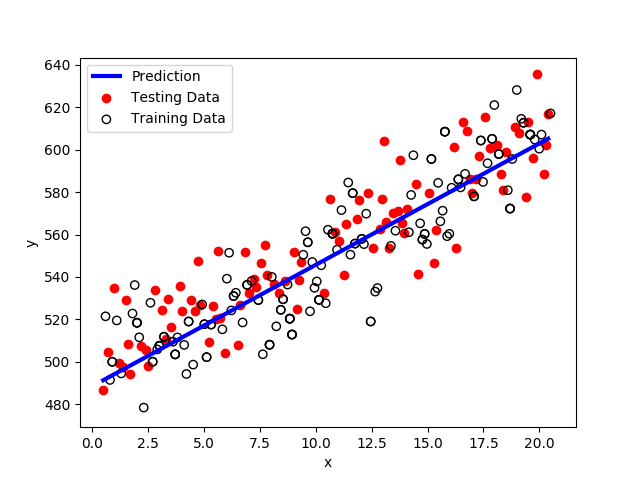

(93, 1) (93, 1)


In [161]:
data = linear_regression(xs, ys, fractest=0.2, plot=True, sk_intercept=True, man_intercept=False,
                         ret_test=True, ret_pred=True)

Now we will do a multi-dimensional example with home prices. The 

In [128]:
# M dimensional example
housing = pd.read_csv("~/machlearn_workshop/stanford_dl_ex/ex1/housing.data", delim_whitespace=True, header=-1)
print("Housing shape:", housing.shape)
housing

Housing shape: (506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [132]:
housing.shape
xhous = housing.iloc[:,:13]
xhous = np.array(xhous)
print("X shape:", xhous.shape)
yhous = housing.iloc[:,13]
yhous = np.array(yhous)
print("Y shape:", yhous.shape)

X shape: (506, 13)
Y shape: (506,)


In [167]:
data = linear_regression(xhous, yhous, fractest=0.2, plot=False, sk_intercept=True, man_intercept=False,
                         ret_test=True, ret_pred=True)

X shape: (506, 13)
Y shape: (506, 1)
Coefficients: 
 [[  5.34451902e-03   3.40500059e-02   1.30544516e-02   2.45397186e+00
   -1.64172943e+01   5.32204953e+00  -3.78354297e-03  -1.28158453e+00
    2.17467591e-01  -1.32877746e-02  -1.05704248e+00   1.08047330e-02
   -3.94191789e-01]]
Mean squared error: 25.26
Variance score: 0.67


(222, 13)
(222, 1)
(222, 1)


<IPython.core.display.Javascript object>


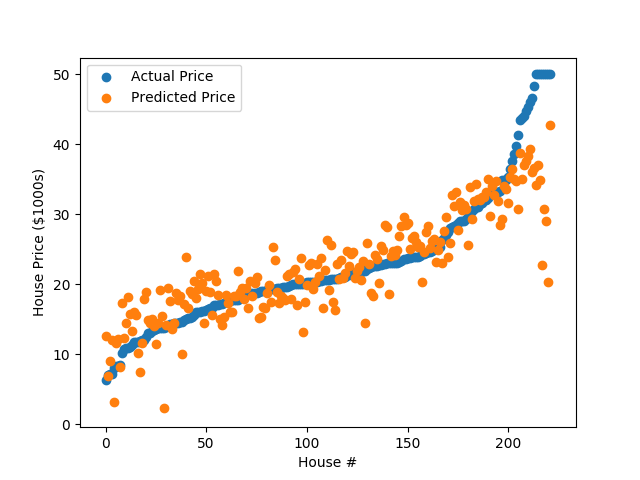

In [166]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
sorted_inds = np.argsort(data[1], axis=0)
plt.figure()
plt.scatter(np.arange(data[0].shape[0]), data[1][sorted_inds], label="Actual Price")
plt.scatter(np.arange(data[0].shape[0]), data[2][sorted_inds], label="Predicted Price")
plt.legend(loc='best')
plt.xlabel('House #')
plt.ylabel('House Price ($1000s)')
plt.plot()
plt.show()

## Linear Regression Pros and Cons

Pros:
* Quick to implement and run
* Easy to understand
* Good for predicting continuous values

Cons:
* Must fit data to a line
* Must know true values for training (supervised)
* Bad for predicting labels not tied to a continuous value

## Logistic Regression

Suppose that instead of predicting a continuum of values, we just wanted to classify our dataset into 2 categories. Doing so with a linear regression could be done if the categories were well separated on some continuum (i.e. if $x_i\theta < k$ then 0; else 1), but this requires tuning k and does not work if the labels are not well separated on a continuum. For this, we look toward Logistic Regression.

\begin{align*}
    f(x) = \frac{1}{1+\exp(mx+b)}
\end{align*}

<IPython.core.display.Javascript object>


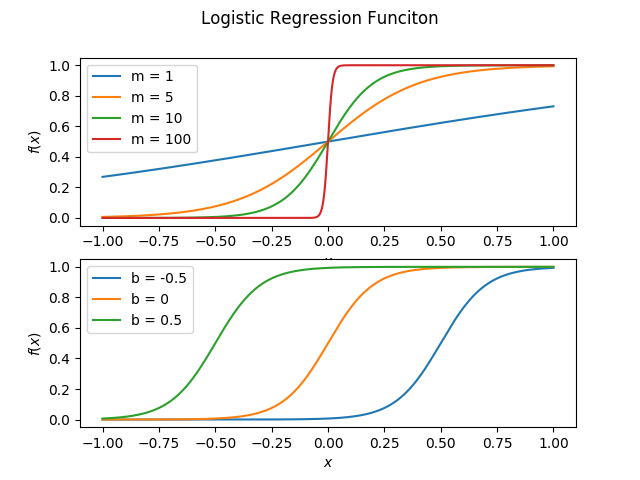

In [45]:
xs = np.linspace(-1, 1, 1000)
ms = [1, 5, 10, 100]
bs = [-0.5, 0, 0.5]

fig, ax = plt.subplots(2)

for m in ms:
    fxs = 1/(1+np.exp(-m*xs))
    ax[0].plot(xs, fxs, label="m = {}".format(m))
    
for b in bs:
    fxs = 1/(1+np.exp(-10*(xs+b)))
    ax[1].plot(xs, fxs, label="b = {}".format(b))

plt.suptitle("Logistic Regression Funciton")

for i in range(2):
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$f(x)$')
    ax[i].legend(loc='best')


plt.show()